In [73]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### 1. Two-Tailed Tests

In this section, we are testing if the means of the two groups for each policy category are statistically significant. The null hypothesis is there is no difference in mean based on an alpha score of 0.05

In [86]:
df = pd.read_csv("vader_sentiment_tweets.csv")

In [87]:
df.head(5)

,tweet_id,username,party,tweet,clean_text,favorite_count,retweet_count,created_at,source,social_policy,...,rank,score,govtrack_cluster,progressive_cluster,govtrack_class,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment,sentiment_text
0,1453097115664662536,RepMikeGarcia,R,I joined fellow China Task Force lawmakers in ...,joined fellow china task force lawmakers in s...,43,29,2021-10-26 20:32:04+00:00,Twitter Web App,NaN,...,#218,0.44,2,3,Centrist,0.000001,0.807001,0.193001,-0.771699,negative
1,1511713375218245640,RepGallagher,R,"Rep. Gallagher: ""If we do not invest in hard p...",rep gallagher if we do not invest in hard powe...,25,11,2022-04-06 14:32:09+00:00,Twitter Web App,NaN,...,#52,0.76,4,4,Far Right,0.113001,0.786001,0.101001,-0.128999,negative
2,1381021863313350658,RepDLesko,R,"CBP is currently encountering over 5,000 peopl...",cbp is currently encountering over 000 people ...,283,82,2021-04-10 23:10:45+00:00,Twitter for iPhone,Social Policies,...,#7,0.91,4,4,Far Right,0.029001,0.860001,0.110001,-0.678299,negative
3,1362468292569534465,RepDebDingell,D,It’s past time our country ban discrimination ...,it is past time our country ban discrimination...,92,21,2021-02-18 18:25:29+00:00,Twitter Web App,Social Policies,...,#351,0.25,1,0,Left Centrist,0.086001,0.799001,0.115001,-0.226299,negative
4,1551368623142363138,RepCarbajal,D,Proud to present the Woman of the Year Award t...,proud to present the woman of the year award t...,17,1,2022-07-25 00:47:57+00:00,Twitter for iPhone,Social Policies,...,#283,0.32,1,0,Left Centrist,0.329001,0.671001,0.000001,0.940301,positive


In [88]:
def reported_value(p_value: float, alpha: float = 0.05) -> float:

    # round off the p_value
    # if p_value > 0.01, it's rounded to two decimal places
    # if p_value == alpha value, rounded to three decimal values
    # p_value < 0.01 rounded to 3 decimal places

    if p_value > 0.01:
        rounded_p = np.round(p_value, 2)

        if rounded_p == alpha:
            rounded_p = np.round(p_value, 3)

    if p_value < 0.01:

        rounded_p = np.round(p_value, 3)

    return rounded_p


def df_queries(df: pd.DataFrame, policy: str, test_group: tuple):

    # query data belonging to a given policy
    # Further filter down queried data into specific political group
    # return two data frames

    df_ = df.query(f"policy == '{policy}'")  # extract data of a specific policy
    group_1 = df_.query(f"govtrack_class == '{test_group[0]}'")
    group_2 = df_.query(f"govtrack_class == '{test_group[1]}'")

    return group_1, group_2


def two_t_test(df: pd.DataFrame, test_group: tuple) -> pd.DataFrame:

    """This function computes the t-test for two independent data samples.
    In this case, compares the means of the sentiment values between two given political groups per policy.

    Ho: The averages of the sentiment values of the two independent samples are equal.

    Assumptions: Homogeneity of variances of the two groups

    :param df: pd.DataFrame, tabulated data for analysis
    :param test_group: tuple, paired political groups for comparison
    :param alpha: float, significance value

    :returns: pd. Dataframe, tabulated P-values for each policy
    """

    t_test_values = []

    policies = df.policy.unique()  # list of policies in study

    for policy in policies:

        group_1, group_2 = df_queries(df, policy, test_group)

        # compute independent t-test
        t_stat, p_value = stats.ttest_ind(
            group_1.compound_sentiment, group_2.compound_sentiment
        )

        # report standardized P-value
        p_value = reported_value(p_value)

        t_test_values.append(
            {"policy": policy, "p-value": p_value, "t-stat": np.round(t_stat, 3)}
        )

    print(
        f"\nTabulated T-Test Results Between the {test_group[0]} and {test_group[1]} Groups"
    )

    return pd.DataFrame(t_test_values)

In [89]:
# test for homegeinity of variance
def levenes_test():
    """ """

In [90]:
political_groups = list(df.govtrack_class.unique())
political_groups.remove("Centrist")

paired_groups = list(itertools.combinations(political_groups, 2))
paired_groups

[('Far Right', 'Left Centrist'),
 ('Far Right', 'Right Centrist'),
 ('Far Right', 'Far Left'),
 ('Left Centrist', 'Right Centrist'),
 ('Left Centrist', 'Far Left'),
 ('Right Centrist', 'Far Left')]

In [91]:
for group in paired_groups:
    results = two_t_test(df, group)
    print(results)


Tabulated T-Test Results Between the Far Right and Left Centrist Groups
                               policy  p-value  t-stat
0             Chinese Communist Party    0.003  -2.933
1                      Ukraine Russia    0.000  -6.627
2      Immigration and Border Control    0.000 -45.375
3                     LGBTQ Community    0.370  -0.895
4   Substance Abuse and Mental Health    0.000  -4.505
5                      Climate Change    0.000  -4.475
6                  Broadband Internet    0.000  -3.649
7                            Abortion    0.000  -4.889
8                        Fossil Fuels    0.000  -7.929
9                         Gun Control    0.000   4.982
10                             Taiwan    0.320  -0.987
11                  Chips Science Act    0.000  -4.771

Tabulated T-Test Results Between the Far Right and Right Centrist Groups
                               policy  p-value  t-stat
0             Chinese Communist Party    0.820  -0.223
1                      Ukrai

### Anova (One-way and Two-Way Anova)


In [92]:
def check_normal_dist(df):

    """check if test data is normally distributed using Shapiro-Wilk Test.
    If the p-value is significant then, data is drawn from normal distribution"""

    policies = df.policy.unique()

    for policy in policies:

        df_ = df.query(f"policy == '{policy}'")

        t_test, p_value = stats.shapiro(df_.compound_sentiment)

        p_value = reported_value(p_value)
        t_test = np.around(t_test, 3)

        print(f"Policy: {policy} T-stat: {t_test} P Value: {p_value}")

In [93]:
check_normal_dist(df)

Policy: Chinese Communist Party T-stat: 0.949 P Value: 0.0
Policy: Ukraine Russia T-stat: 0.935 P Value: 0.0
Policy: Immigration and Border Control T-stat: 0.91 P Value: 0.0
Policy: LGBTQ Community T-stat: 0.861 P Value: 0.0
Policy: Substance Abuse and Mental Health T-stat: 0.893 P Value: 0.0
Policy: Climate Change T-stat: 0.906 P Value: 0.0
Policy: Broadband Internet T-stat: 0.903 P Value: 0.0
Policy: Abortion T-stat: 0.921 P Value: 0.0
Policy: Fossil Fuels T-stat: 0.949 P Value: 0.0
Policy: Gun Control T-stat: 0.864 P Value: 0.0
Policy: Taiwan T-stat: 0.905 P Value: 0.0
Policy: Chips Science Act T-stat: 0.887 P Value: 0.0


/home/denniesbor/miniconda3/envs/nlp-notebook-env/lib/python3.10/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [94]:
def one_way_anova(df: pd.DataFrame, test_group: tuple) -> pd.DataFrame:

    """Determines if there is any statistically significant difference
    between the means of two or more independent groups of data. The political
    groups are paired, and the means of the sentiments are compared in each policy category.

    H0: There is no statistically significant difference between the means of
    the independent groups (m1 = m2 = m3 =... = mk) where k is the number of groups.

    Assumptions:

    - The samples are independent.
    - Each sample is from a normally distributed population.
    - Homogeneity of variance

    :param df: pd.DataFrame, tabulated data for analysis
    :param test_group: tuple, paired political groups for comparison

    :returns: pd. Dataframe, tabulated P-values for each policy
    """

    policies = df.policy.unique()
    test_result = []

    for policy in policies:

        group_1, group_2 = df_queries(df, policy, test_group)

        f_stat, p_value = stats.f_oneway(
            group_1.compound_sentiment, group_2.compound_sentiment
        )

        p_value = reported_value(p_value)
        f_stat = np.round(f_stat, 3)

        test_result.append({"policy": policy, "p-value": p_value, "f-stat": f_stat})

    print(f"\n{test_group[0]} vs {test_group[1]}")

    return pd.DataFrame(test_result)

In [95]:
for group in paired_groups:
    results = one_way_anova(df, group)
    print(results)


Far Right vs Left Centrist
                               policy  p-value    f-stat
0             Chinese Communist Party    0.003     8.604
1                      Ukraine Russia    0.000    43.915
2      Immigration and Border Control    0.000  2058.893
3                     LGBTQ Community    0.370     0.801
4   Substance Abuse and Mental Health    0.000    20.293
5                      Climate Change    0.000    20.030
6                  Broadband Internet    0.000    13.316
7                            Abortion    0.000    23.907
8                        Fossil Fuels    0.000    62.874
9                         Gun Control    0.000    24.818
10                             Taiwan    0.320     0.974
11                  Chips Science Act    0.000    22.763

Far Right vs Right Centrist
                               policy  p-value  f-stat
0             Chinese Communist Party    0.820   0.050
1                      Ukraine Russia    0.000  21.241
2      Immigration and Border Control

## Two-Way Anova

In [56]:
!python -m pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 128.7 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 241.3 kB/s eta 0:00:001m238.5 kB/s eta 0:00:01


In [57]:
# imports

import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [58]:
# investigating the influence of policy, political class and interaction of policy and politcal group on on sentiment values,

df.head(5)

,username,party,clean_text,compound_sentiment,govtrack_class,policy
0,repdinatitus,D,our dependence on foreign fossil fuels empower...,0.177901,Left Centrist,Fossil Fuels
1,RepEspaillat,D,our immigration system targets entire groups o...,-0.680799,Far Left,Immigration and Border Control
2,RepJohnCurtis,R,russia atrocities in ukraine do not make it ok...,0.161501,Right Centrist,Fossil Fuels
3,RepDLesko,R,more than million illegal immigrants will be g...,-0.828899,Far Right,Immigration and Border Control
4,RepTimRyan,D,am glad to see the take steps to hold china a...,-0.658799,Centrist,Chinese Communist Party


### Grouping the Left and Right Categories

In [77]:
df_two_anova = df.copy()
df_two_anova["general_class"] = df_two_anova["govtrack_class"].map(
    {
        "Far Left": "Left",
        "Far Right": "Right",
        "Left Centrist": "Left",
        "Right Centrist": "Right",
    }
)

df_two_anova = df_two_anova.query("general_class == 'Left' | general_class == 'Right'")

In [79]:
# fit data into the model

multiple_variables = ols(
    "compound_sentiment ~ C(policy) + C(general_class) + C(policy): C(general_class) ",
    data=df_two_anova,
).fit()

In [80]:
# type two Anova

sms.anova_lm(multiple_variables, typ=2)

,sum_sq,df,F,PR(>F)
C(policy),2547.961543,11.0,693.294198,0.000000e+00
C(general_class),295.418905,1.0,884.210497,4.759454e-193
C(policy):C(general_class),789.447419,11.0,214.806741,0.000000e+00
Residual,22484.245705,67297.0,NaN,NaN


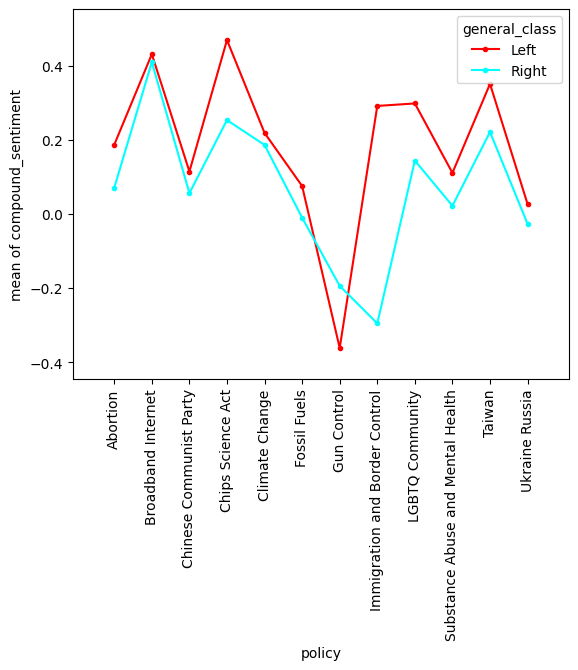

In [82]:
# interaction plot

interaction_plot(
    df_two_anova["policy"],
    df_two_anova["general_class"],
    df_two_anova["compound_sentiment"],
)
plt.xticks(rotation=90)
plt.show()